In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [ ]:
#carga y lectura de archivo
archivo=r'Datos_Examen.xlsx'
df=pd.read_excel(archivo)
df

,Semana,Venta Total Sistema,awo total sistema,Órdenes Total Sistema,Paid Social,Programmatic,TV Spots & Sponsorships,TV de Paga,TV Local,OOH,...,SMS PRF,Twitter PRF,Youtube PRF,Google Brand,Facebook Brand,TikTok Brand,Spotify Bran,Twitch Brand,DV360 Brand,TOTAL
0,2022_1,1.772248e+08,1020.000000,799308,0,0.000000,0.000000e+00,0.0,0,0.000000e+00,...,0,0,0,0.00,10031.0575,0.00,0.0,0.0,0.0,1.666809e+06
1,2022_2,1.789880e+08,1031.000000,808574,0,0.000000,2.273115e+06,0.0,0,4.166668e+05,...,0,0,0,0.00,10031.0575,0.00,0.0,0.0,0.0,4.356591e+06
2,2022_3,1.737100e+08,1003.000000,785357,0,0.000000,2.427435e+06,0.0,0,4.166668e+05,...,0,0,0,0.00,10031.0575,0.00,0.0,0.0,0.0,4.510911e+06
3,2022_4,1.711575e+08,991.000000,775210,0,0.000000,2.077477e+06,0.0,0,4.166668e+05,...,0,0,0,0.00,10031.0575,0.00,0.0,0.0,0.0,4.160953e+06
4,2022_5,1.637617e+08,951.000000,744424,0,0.000000,2.030739e+06,0.0,0,3.125001e+05,...,0,0,0,0.00,13074.0475,0.00,0.0,0.0,0.0,3.741706e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2024_9,2.424183e+08,1156.487064,1028117,0,0.000000,4.085684e+06,0.0,0,1.041374e+06,...,0,0,0,285394.07,295748.7000,222317.16,0.0,0.0,0.0,7.917531e+06
113,2024_10,2.029190e+08,928.698876,826542,0,117671.774931,2.457362e+06,0.0,0,5.807452e+05,...,0,0,0,91438.49,89383.3300,77845.56,0.0,0.0,0.0,4.047800e+06
114,2024_11,2.065120e+08,940.288117,838737,0,124342.002506,2.510492e+06,85000.0,0,5.356138e+05,...,0,0,0,91929.70,102330.9900,1125679.24,0.0,0.0,0.0,5.271972e+06
115,2024_12,2.193739e+08,994.608744,887191,0,124001.428355,2.586449e+06,0.0,0,5.356138e+05,...,0,0,0,91151.51,102465.5000,339078.35,0.0,0.0,0.0,4.564446e+06


In [ ]:
#limpieza de datos en columnas
df['Radio']=df['Radio'].replace(' - ','0')
df['Radio']=df['Radio'].astype(float)

In [ ]:
#muestreo de estructura de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Semana                   117 non-null    object 
 1   Venta Total Sistema      117 non-null    float64
 2   awo total sistema        117 non-null    float64
 3   Órdenes Total Sistema    117 non-null    int64  
 4   Paid Social              117 non-null    int64  
 5   Programmatic             117 non-null    float64
 6   TV Spots & Sponsorships  117 non-null    float64
 7   TV de Paga               117 non-null    float64
 8   TV Local                 117 non-null    int64  
 9   OOH                      117 non-null    float64
 10  Radio                    117 non-null    float64
 11  OLV (YouTube, etc.)      117 non-null    int64  
 12  Google Performance       117 non-null    float64
 13  Facebook PFR             117 non-null    float64
 14  TikTok PRF               1

In [ ]:
#analisis de correlacion d evariables
df.corr()

,Semana,Venta Total Sistema,awo total sistema,Órdenes Total Sistema,Paid Social,Programmatic,TV Spots & Sponsorships,TV de Paga,TV Local,OOH,...,SMS PRF,Twitter PRF,Youtube PRF,Google Brand,Facebook Brand,TikTok Brand,Spotify Bran,Twitch Brand,DV360 Brand,TOTAL
Semana,1.000000,0.058004,0.019081,-0.030130,NaN,-0.340744,-0.073837,0.372428,0.188933,0.171290,...,NaN,NaN,NaN,0.147233,0.176867,-0.042469,0.106759,0.137131,0.104321,0.047058
Venta Total Sistema,0.058004,1.000000,0.865737,0.971022,NaN,0.365342,-0.008164,-0.070435,0.117594,0.398578,...,NaN,NaN,NaN,0.065968,0.230661,0.337540,0.103943,0.017464,0.200836,0.138506
awo total sistema,0.019081,0.865737,1.000000,0.934064,NaN,0.165595,-0.018887,-0.086633,0.028197,0.405188,...,NaN,NaN,NaN,-0.039755,0.107951,0.129319,0.060846,0.058557,0.068216,0.093903
Órdenes Total Sistema,-0.030130,0.971022,0.934064,1.000000,NaN,0.338709,0.000833,-0.110564,0.051188,0.437199,...,NaN,NaN,NaN,0.032915,0.181702,0.290147,0.063564,-0.003112,0.153925,0.138398
Paid Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Programmatic,-0.340744,0.365342,0.165595,0.338709,NaN,1.000000,0.018252,-0.221930,-0.092815,0.228581,...,NaN,NaN,NaN,0.128996,0.048787,0.227383,-0.052452,-0.072203,-0.106792,0.027884
TV Spots & Sponsorships,-0.073837,-0.008164,-0.018887,0.000833,NaN,0.018252,1.000000,-0.240351,0.235102,0.099885,...,NaN,NaN,NaN,-0.082482,0.123554,0.229520,0.217583,-0.168490,-0.065574,0.820053
TV de Paga,0.372428,-0.070435,-0.086633,-0.110564,NaN,-0.221930,-0.240351,1.000000,0.001178,0.063276,...,NaN,NaN,NaN,0.353954,0.107406,0.026236,-0.116357,0.397556,0.192157,-0.003644
TV Local,0.188933,0.117594,0.028197,0.051188,NaN,-0.092815,0.235102,0.001178,1.000000,0.361647,...,NaN,NaN,NaN,0.058535,0.090466,0.069336,0.409054,-0.092419,0.046412,0.385321
OOH,0.171290,0.398578,0.405188,0.437199,NaN,0.228581,0.099885,0.063276,0.361647,1.000000,...,NaN,NaN,NaN,0.260093,0.187523,0.149865,0.020668,-0.056606,-0.032569,0.422475


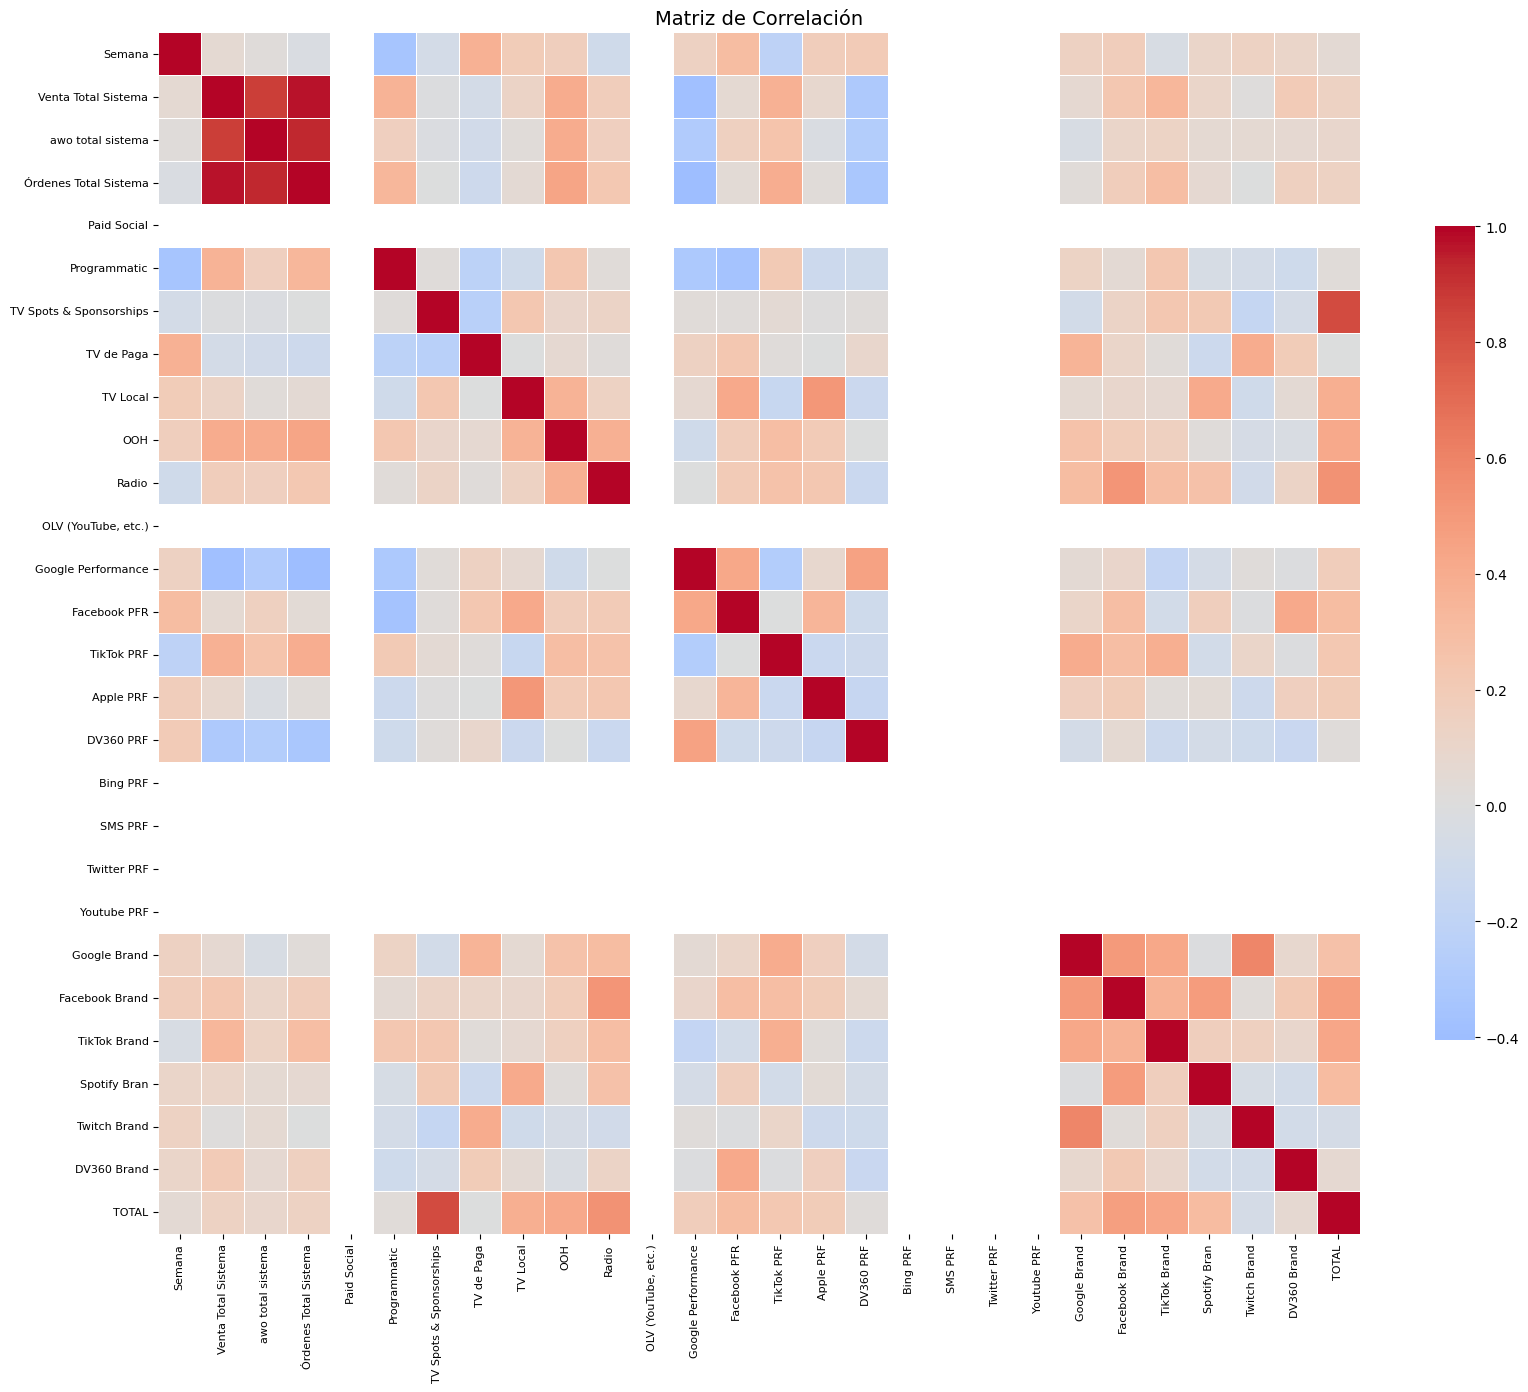

In [ ]:
# Creacion de grafica de corre;lacion para una mejor interp[retacion]
corr=df.corr()

# Ajustar el tamaño de la figura según el número de columnas
plt.figure(figsize=(len(corr.columns) * 0.6, len(corr.columns) * 0.6))

sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, square=True,cbar_kws={"shrink": 0.5}, linewidths=0.5)
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

#muestreo de la grafica
plt.title("Matriz de Correlación", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#se muestran aquellas columnas para evaluar el pca
cols=['Venta Total Sistema', 'awo total sistema',
       'Órdenes Total Sistema', 'Paid Social', 'Programmatic',
       'TV Spots & Sponsorships', 'TV de Paga', 'TV Local', 'OOH', 'Radio',
       'OLV (YouTube, etc.)', 'Google Performance', 'Facebook PFR',
       'TikTok PRF', 'Apple PRF', 'DV360 PRF', 'Bing PRF', 'SMS PRF',
       'Twitter PRF', 'Youtube PRF', 'Google Brand', 'Facebook Brand',
       'TikTok Brand', 'Spotify Bran', 'Twitch Brand', 'DV360 Brand', 'TOTAL']
# Selecciona solo columnas numéricas
X = df[cols].select_dtypes(include=[float, int])

# Elimina columnas constantes o NaNs
X = X.dropna(axis=1, how='any')             # Quitar columnas con NaNs
X = X.loc[:, X.nunique() > 1]               # Quitar columnas constantes

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


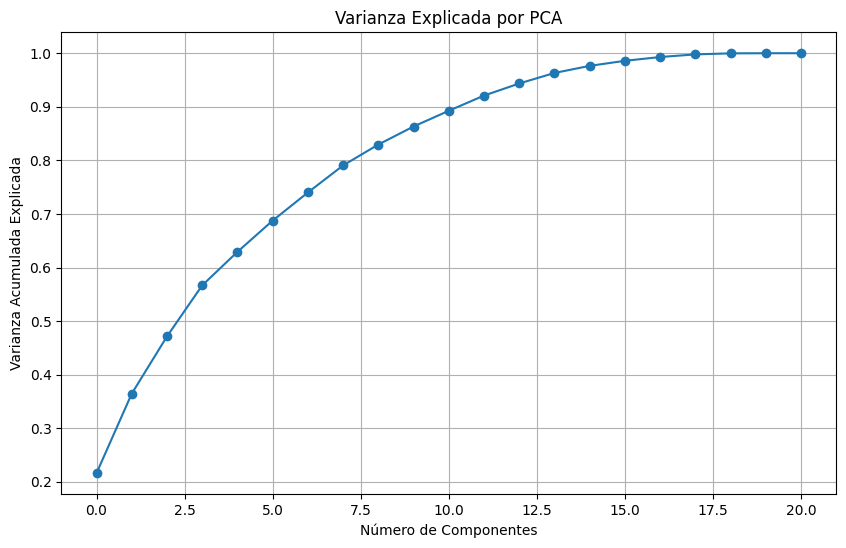

In [ ]:

# Graficar varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Explicada por PCA')
plt.grid(True)
plt.show()


In [ ]:
#despues de usar la grafica se seleccionan 12 componentes para la muyesra de pca
pca_final = PCA(n_components=12)
X_reduced = pca_final.fit_transform(X_scaled)

# Cargas de los componentes
loadings = pd.DataFrame(pca_final.components_.T,
                        columns=[f'PC{i+1}' for i in range(12)],
                        index=X.columns)

print(loadings)


                              PC1       PC2       PC3       PC4       PC5  \
Venta Total Sistema      0.370620 -0.257323 -0.051188  0.166977  0.100509   
awo total sistema        0.314830 -0.257317 -0.080724  0.230431  0.229108   
Órdenes Total Sistema    0.369332 -0.284519 -0.066619  0.159334  0.147597   
Programmatic             0.145681 -0.253695 -0.014729 -0.257024 -0.032767   
TV Spots & Sponsorships  0.119712  0.189579 -0.298772 -0.360407  0.058246   
TV de Paga              -0.006232  0.144557  0.420650  0.208304  0.077471   
TV Local                 0.148867  0.270542 -0.253396  0.175831 -0.258776   
OOH                      0.287600  0.036437 -0.039924  0.029278  0.246603   
Radio                    0.268941  0.191717  0.014207 -0.083886  0.004302   
Google Performance      -0.140301  0.349042  0.048072  0.066542  0.415114   
Facebook PFR             0.117413  0.326822 -0.020099  0.413750  0.140831   
TikTok PRF               0.248025 -0.110079  0.233035 -0.189946  0.140977   

In [ ]:
# Creamos un DataFrame con las PCs
pc_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])

# Asegúrate de alinear las filas con la columna objetivo
pc_df['awo_total_sistema'] = df['awo total sistema'].values[:len(pc_df)]

# Calcular correlaciones
correlations = pc_df.corr()['awo_total_sistema'].drop('awo_total_sistema').sort_values(ascending=False)
print(correlations)


PC1     0.670632
PC4     0.326033
PC7     0.303968
PC5     0.262643
PC6     0.012292
PC8    -0.019312
PC9    -0.051449
PC12   -0.080815
PC11   -0.098775
PC10   -0.112649
PC3    -0.120910
PC2    -0.454318
Name: awo_total_sistema, dtype: float64


In [ ]:
# Separar año y número de semana
df[['Año', 'Nro_Semana']] = df['Semana'].str.split('_', expand=True).astype(int)

# Crear fecha con lunes de cada semana (ISO estándar)
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + df['Nro_Semana'].astype(str) + '1', format='%G%V%u')

# Ordenar por fecha e indexar
df = df.sort_values('Fecha').set_index('Fecha')

#variables que se usaran para prediccion del modelo
variables_modelo = ['awo total sistema', 'Facebook PFR', 'OOH']
df_reducido = df[variables_modelo].dropna()


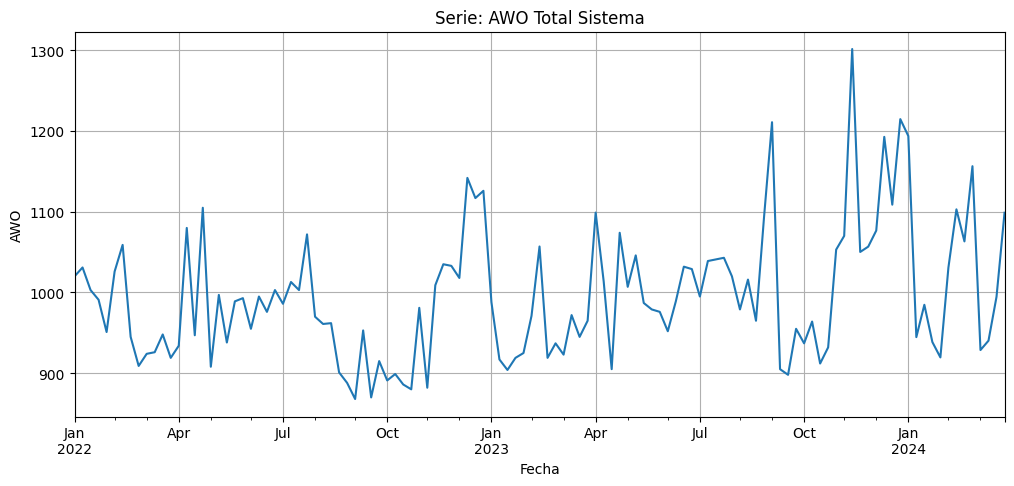

In [ ]:
#evaluacio de la serie
df_reducido['awo total sistema'].plot(figsize=(12, 5), title='Serie: AWO Total Sistema')
plt.ylabel('AWO')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()


In [ ]:
# Tamaño de la muestra total
n = len(df_reducido)

# Número de observaciones para test
n_test = 20


# División temporal
y_train = df_reducido['awo total sistema'].iloc[:-n_test]
y_test = df_reducido['awo total sistema'].iloc[-n_test:]

X_train = df_reducido[['Facebook PFR', 'OOH']].iloc[:-n_test]
X_test = df_reducido[['Facebook PFR', 'OOH']].iloc[-n_test:]

# Crear y ajustar modelo solo con datos de entrenamiento
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 0))
result = model.fit(disp=False)

# Predecir sobre el conjunto de prueba
y_forecast = result.forecast(steps=len(y_test), exog=X_test)

#se apl;ican metricas de evaluacion
rmse = np.sqrt(mean_squared_error(y_test, y_forecast))
mae = mean_absolute_error(y_test, y_forecast)
mape = np.mean(np.abs((y_test - y_forecast) / y_test)) * 100
precision = 100 - mape

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'Precisión estimada (test): {precision:.2f}%')


RMSE: 148.89
MAE: 122.92
MAPE: 11.01%
Precisión estimada (test): 88.99%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


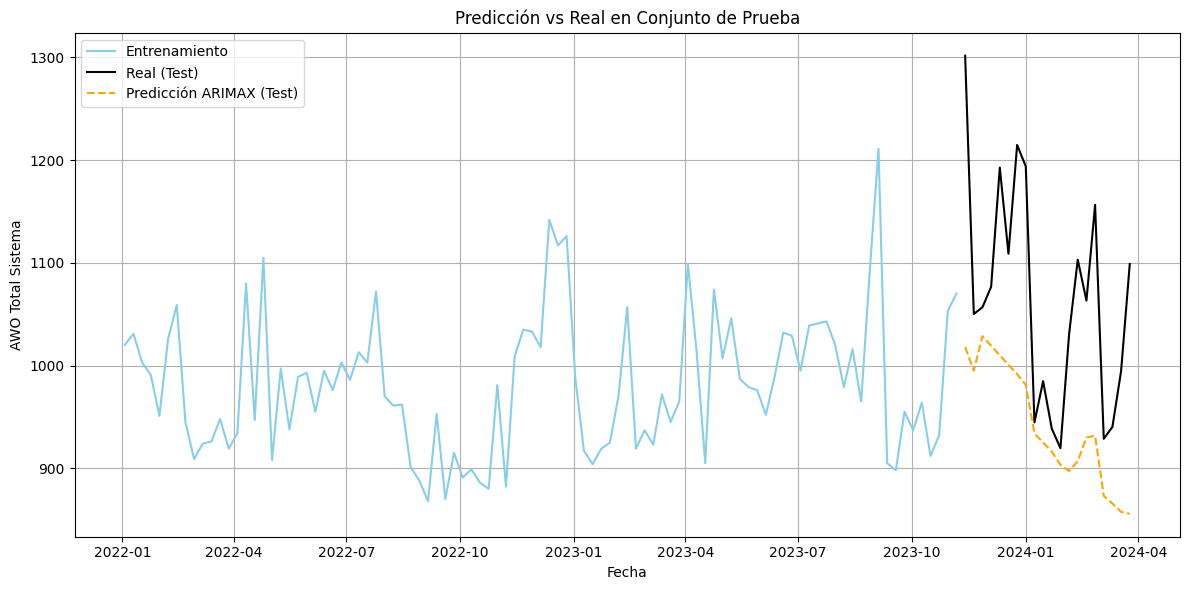

In [ ]:

# Construimos series completas con el índice total
full_index = df_reducido.index

# Series extendidas con NaNs donde no corresponden
y_train_plot = pd.Series(data=np.nan, index=full_index)
y_train_plot.loc[y_train.index] = y_train

y_test_plot = pd.Series(data=np.nan, index=full_index)
y_test_plot.loc[y_test.index] = y_test

y_forecast_plot = pd.Series(data=np.nan, index=full_index)
y_forecast_plot.loc[y_forecast.index] = y_forecast

# Graficar
plt.figure(figsize=(12, 6))

plt.plot(y_train_plot, label='Entrenamiento', color='skyblue')
plt.plot(y_test_plot, label='Real (Test)', color='black')
plt.plot(y_forecast_plot, label='Predicción ARIMAX (Test)', color='orange', linestyle='--')

plt.title('Predicción vs Real en Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('AWO Total Sistema')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#primera muestra del modelo

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


=====[ARIMAX]==
[ARIMAX] RMSE: 108.04
[ARIMAX] MAE: 83.82
[ARIMAX] MAPE: 7.79%
[ARIMAX] Precisión estimada: 92.21%


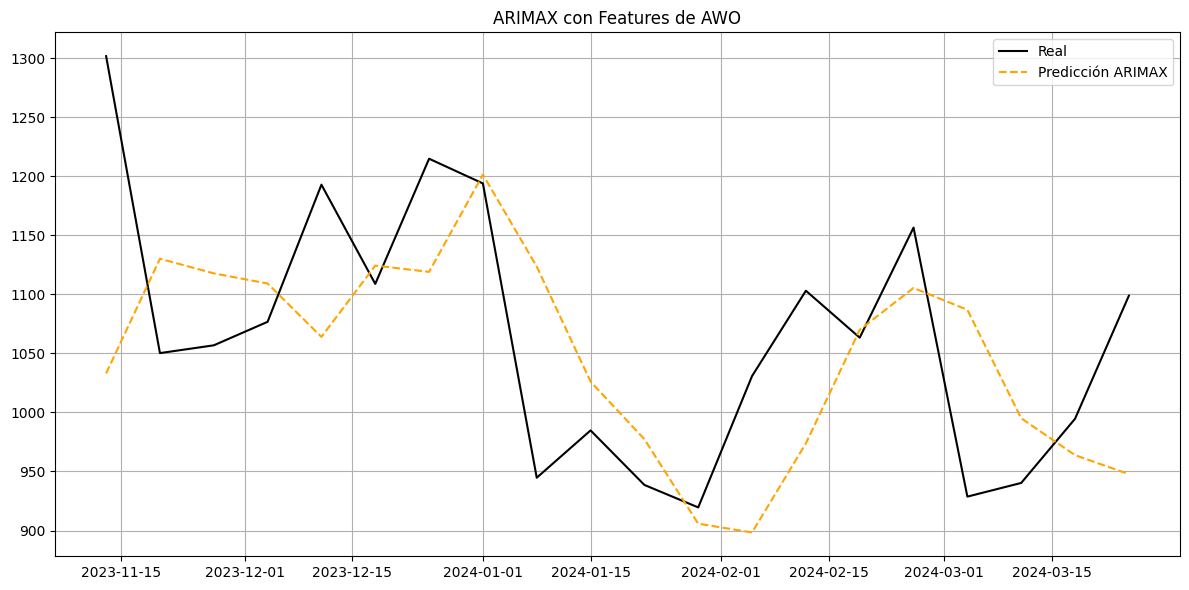

In [ ]:


# ----- Feature engineering -----
df = df_reducido.copy()
df['awo_lag1'] = df['awo total sistema'].shift(1)
df['awo_lag2'] = df['awo total sistema'].shift(2)
df['awo_diff1'] = df['awo_lag1'] - df['awo_lag2']
df['awo_ma3'] = df['awo_lag1'].rolling(3).mean()
df = df.dropna()

# ----- Datos -----
features = ['Facebook PFR', 'OOH', 'awo_lag1', 'awo_lag2', 'awo_diff1', 'awo_ma3']
X = df[features]
y = df['awo total sistema']

# ----- División train/test -----
n_test = 20
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# ----- Modelo ARIMAX -----
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 0))
result = model.fit(disp=False)

# ----- Predicción -----
y_forecast = result.forecast(steps=len(y_test), exog=X_test)

# ----- Evaluación -----
rmse = np.sqrt(mean_squared_error(y_test, y_forecast))
mae = mean_absolute_error(y_test, y_forecast)
mape = np.mean(np.abs((y_test - y_forecast) / y_test)) * 100
precision = 100 - mape

print(f"=====[ARIMAX]==")
print(f"[ARIMAX] RMSE: {rmse:.2f}")
print(f"[ARIMAX] MAE: {mae:.2f}")
print(f"[ARIMAX] MAPE: {mape:.2f}%")
print(f"[ARIMAX] Precisión estimada: {precision:.2f}%")

# ----- Gráfica -----
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real', color='black')
plt.plot(y_forecast, label='Predicción ARIMAX', color='orange', linestyle='--')
plt.title('ARIMAX con Features de AWO')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
=====[MLP]==
[MLP] RMSE: 162.12
[MLP] MAE: 114.29
[MLP] MAPE: 10.32%
[MLP] Precisión estimada: 89.68%


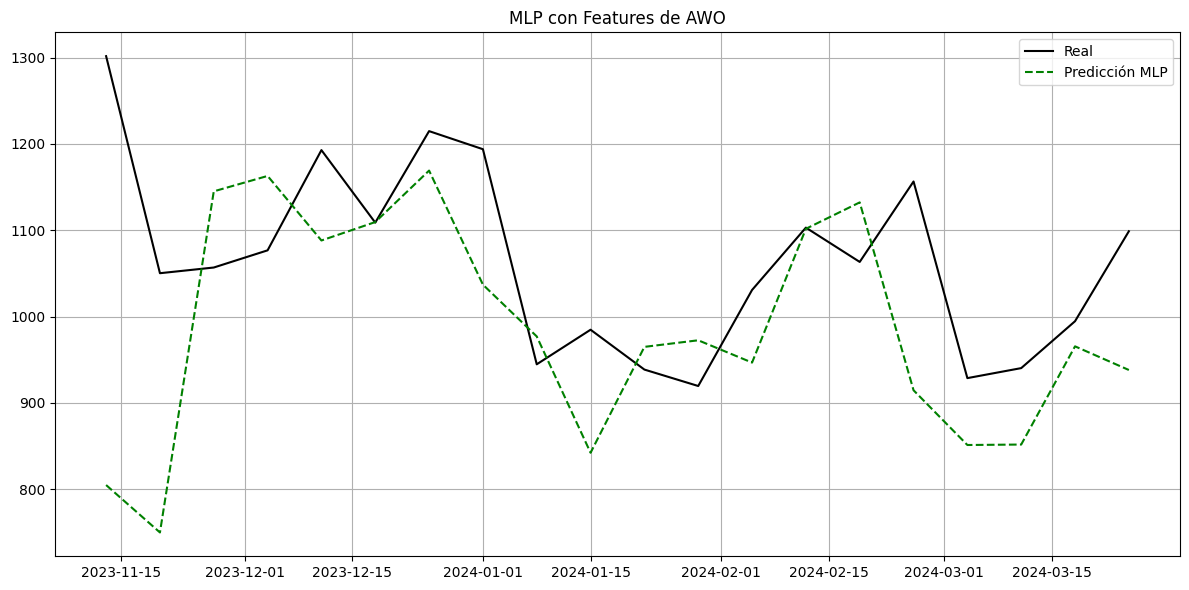

In [ ]:


# ----- Escalado -----
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ----- MLP -----
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(X_train_scaled, y_train_scaled, epochs=100, verbose=0, validation_data=(X_test_scaled, y_test_scaled))

# ----- Predicción -----
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_pred_mlp = pd.Series(y_pred.flatten(), index=y_test.index)

# ----- Evaluación -----
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae = mean_absolute_error(y_test, y_pred_mlp)
mape = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
precision = 100 - mape
print(f"=====[MLP]==")
print(f"[MLP] RMSE: {rmse:.2f}")
print(f"[MLP] MAE: {mae:.2f}")
print(f"[MLP] MAPE: {mape:.2f}%")
print(f"[MLP] Precisión estimada: {precision:.2f}%")

# ----- Gráfica -----
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real', color='black')
plt.plot(y_pred_mlp, label='Predicción MLP', color='green', linestyle='--')
plt.title('MLP con Features de AWO')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
